# Forecast for JJ.csv

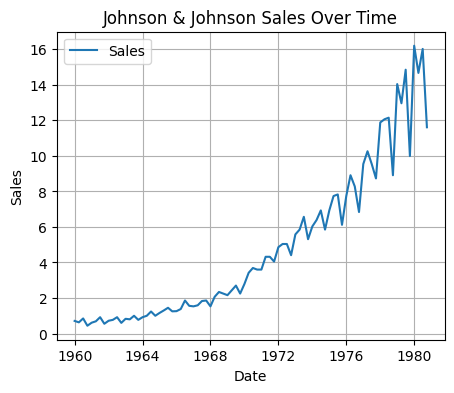

ADF Statistic: 2.7420
p-value: 1.0000
Series is non-stationary. Proceeding to differencing...


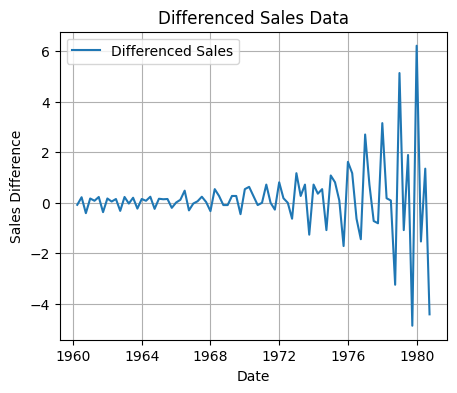

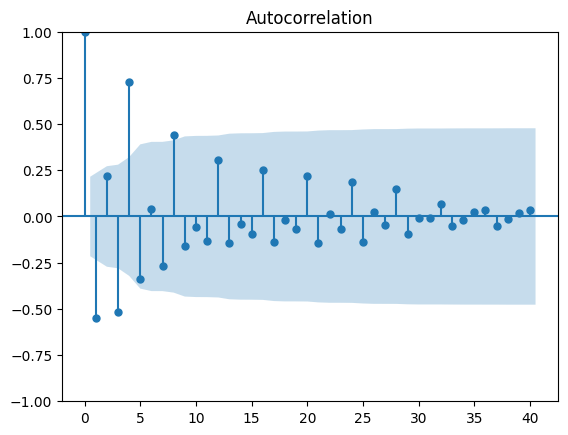

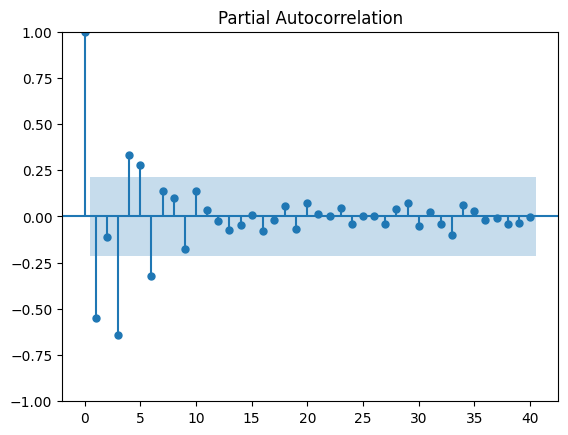

Finding best (p,d,q) using auto_arima...
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=240.020, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=297.285, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=264.953, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=255.333, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=295.995, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=238.454, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=229.503, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=259.465, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=251.412, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=228.486, Time=0.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(1,1,3)(0,0,0)[0

D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   84
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -114.048
Date:                Fri, 11 Apr 2025   AIC                            238.096
Time:                        10:23:45   BIC                            250.190
Sample:                             0   HQIC                           242.954
                                 - 84                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9869      0.140     -7.045      0.000      -1.261      -0.712
ma.L1         -0.4555      0.336     -1.356      0.175      -1.114       0.203
ma.L2         -0.3057      0.312     -0.979      0.3

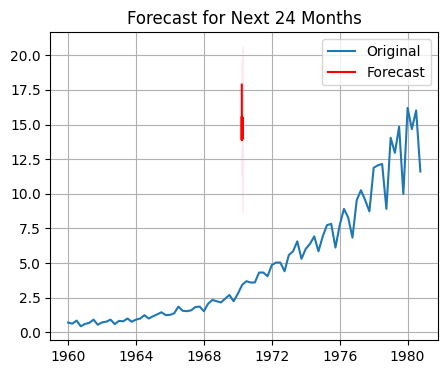

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Load Data

df_jj = pd.read_csv("jj.csv")
df_jj.columns = ['Date', 'Sales']
df_jj['Date'] = pd.to_datetime(df_jj['Date'])
df_jj.set_index('Date', inplace=True)

# Initial Visualization

plt.figure(figsize=(5, 4))
plt.plot(df_jj, label="Sales")
plt.title("Johnson & Johnson Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


# ADF Test for Stationarity

result = adfuller(df_jj['Sales'])
print(f'ADF Statistic: {result[0]:.4f}')
print(f'p-value: {result[1]:.4f}')
if result[1] > 0.05:
    print("Series is non-stationary. Proceeding to differencing...")
    df_jj_diff = df_jj.diff().dropna()
else:
    print("Series is stationary.")
    df_jj_diff = df_jj.copy()


# Plot Differenced Series 

plt.figure(figsize=(5, 4))
plt.plot(df_jj_diff, label="Differenced Sales")
plt.title("Differenced Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales Difference")
plt.grid(True)
plt.legend()
plt.show()


# ACF & PACF

plot_acf(df_jj_diff, lags=40)
plt.show()
plot_pacf(df_jj_diff, lags=40)
plt.show()


# Auto ARIMA to choose best p,d,q

print("Finding best (p,d,q) using auto_arima...")
stepwise_model = auto_arima(df_jj['Sales'], seasonal=False, trace=True)
print(stepwise_model.summary())


# Fit ARIMA model with best (p,d,q)

order = stepwise_model.order
print(f"Using ARIMA{order}")

model = ARIMA(df_jj['Sales'], order=order)
model_fit = model.fit()
print(model_fit.summary())


# Forecasting 24 Months Ahead

n_forecast = 24
forecast = model_fit.get_forecast(steps=n_forecast)
forecast_df = forecast.summary_frame()


# Plot Forecast

plt.figure(figsize=(5, 4))
plt.plot(df_jj, label="Original")
plt.plot(forecast_df['mean'], label="Forecast", color='red')
plt.fill_between(forecast_df.index,
                 forecast_df['mean_ci_lower'],
                 forecast_df['mean_ci_upper'],
                 color='pink', alpha=0.3)
plt.title("Forecast for Next 24 Months")
plt.legend()
plt.grid(True)
plt.show()


# Forecast for Amazon.csv

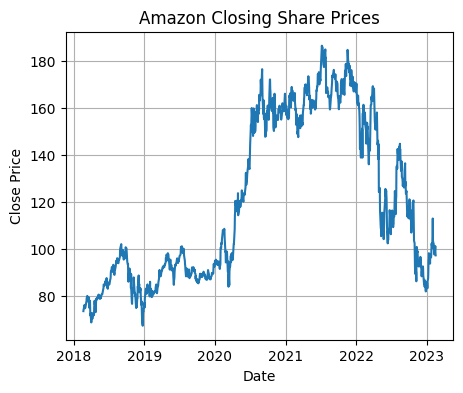

ADF Test (original data):
ADF Statistic: -1.6578089913331724
p-value: 0.4529710546516677
=> Non-Stationary

KPSS Test (original data):
KPSS Statistic: 2.968777228334453
p-value: 0.01
=> Non-Stationary


C:\Users\Bharani\AppData\Local\Temp\ipykernel_16132\3098912922.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(series, regression='c')


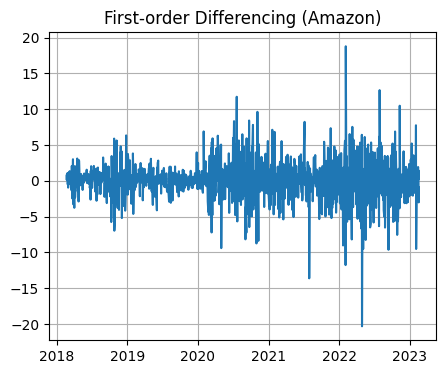

ADF Test after Differencing:
ADF Statistic: -36.25077933242776
p-value: 0.0
=> Stationary

KPSS Test after Differencing:
KPSS Statistic: 0.23664626043873974
p-value: 0.1
=> Stationary


C:\Users\Bharani\AppData\Local\Temp\ipykernel_16132\3098912922.py:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')



Auto ARIMA Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3056.158
Date:                Fri, 11 Apr 2025   AIC                           6122.315
Time:                        10:24:00   BIC                           6148.002
Sample:                             0   HQIC                          6131.969
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6946      0.015   -111.814      0.000      -1.724      -1.665
ar.L2         -0.9604      0.015    -64.728      0.000      -0.989      -0.931
ma.L1          1.6972      0.01

D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Herts\Time_series_modelling_case_study\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results w

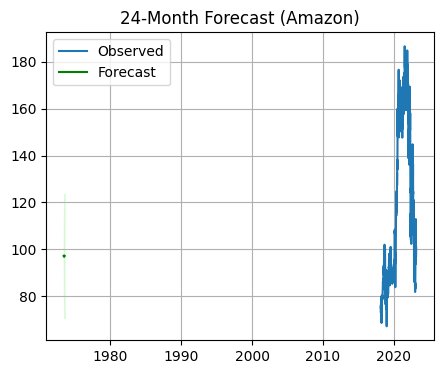

RMSE on training set: 2.746378003515287


In [2]:
#  Libraries 
from statsmodels.tsa.stattools import adfuller, kpss
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

#  Load and plot data 
amzn = pd.read_csv("AMZN.csv")
amzn['Date'] = pd.to_datetime(amzn['Date'])
amzn.set_index('Date', inplace=True)

plt.figure(figsize=(5, 4))
sns.lineplot(data=amzn, x=amzn.index, y='Close')
plt.title('Amazon Closing Share Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

#  Stationarity tests 
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("=> Stationary" if result[1] < 0.05 else "=> Non-Stationary")

def kpss_test(series):
    result = kpss(series, regression='c')
    print("KPSS Statistic:", result[0])
    print("p-value:", result[1])
    print("=> Stationary" if result[1] > 0.05 else "=> Non-Stationary")

print("ADF Test (original data):")
adf_test(amzn['Close'])

print("\nKPSS Test (original data):")
kpss_test(amzn['Close'])

#  Differencing 
amzn_diff = amzn['Close'].diff().dropna()

plt.figure(figsize=(5, 4))
plt.plot(amzn_diff)
plt.title('First-order Differencing (Amazon)')
plt.grid(True)
plt.show()

print("ADF Test after Differencing:")
adf_test(amzn_diff)

print("\nKPSS Test after Differencing:")
kpss_test(amzn_diff)

#  Auto ARIMA 
model_auto = pm.auto_arima(amzn['Close'], seasonal=False, stepwise=True, suppress_warnings=True)
print("\nAuto ARIMA Summary:")
print(model_auto.summary())
order = model_auto.order
print("Using ARIMA order:", order)

#  Fit ARIMA & Forecast 
model = ARIMA(amzn['Close'], order=order)
fitted = model.fit()

forecast = fitted.get_forecast(steps=24)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

plt.figure(figsize=(5, 4))
plt.plot(amzn['Close'], label='Observed')
plt.plot(forecast_df['Forecast'], label='Forecast', color='green')
plt.fill_between(forecast_df.index,
                 forecast_df.iloc[:, 0],
                 forecast_df.iloc[:, 1], color='lightgreen', alpha=0.3)
plt.title("24-Month Forecast (Amazon)")
plt.legend()
plt.grid(True)
plt.show()

#  Model Evaluation 
preds = fitted.predict(start=amzn.index[1], end=amzn.index[-1])
rmse = mean_squared_error(amzn['Close'][1:], preds, squared=False)
print("RMSE on training set:", rmse)


## LSTM and GRU Model compariosn for AMZN.csv

8/8 [==============================] - 0s 3ms/step
LSTM RMSE: 6.28


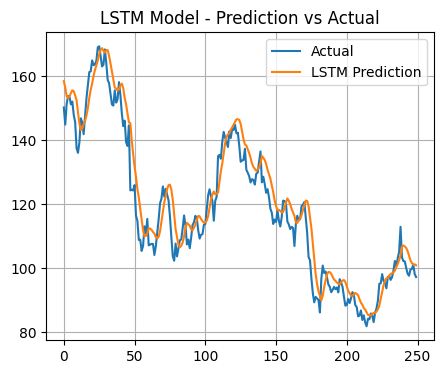

8/8 [==============================] - 0s 2ms/step
GRU RMSE: 4.95


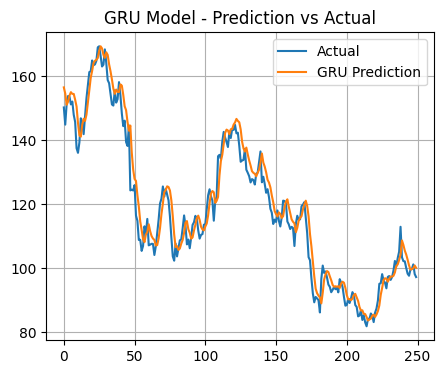

1/1 [==============================] - 0s 19ms/step


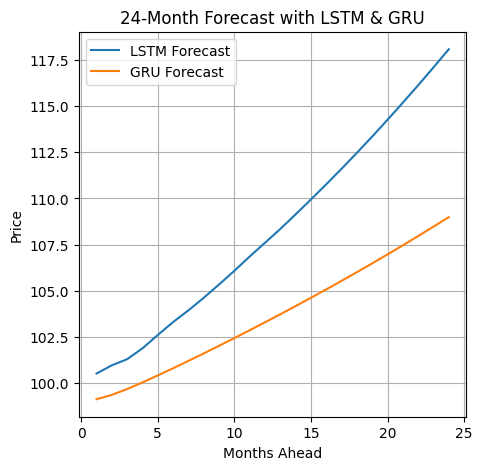

In [3]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping

#  Load and preprocess 
df = pd.read_csv("AMZN.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

#  Create sequences 
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_len = 12
X, y = create_sequences(scaled_data, seq_len)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#  LSTM Model 
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1,
               callbacks=[EarlyStopping(patience=5)], verbose=0)

#  GRU Model 
gru_model = Sequential([
    GRU(50, activation='relu', input_shape=(seq_len, 1)),
    Dense(1)
])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.1,
              callbacks=[EarlyStopping(patience=5)], verbose=0)

#  Evaluation 
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
    print(f"{name} RMSE: {rmse:.2f}")

    plt.figure(figsize=(5, 4))
    plt.plot(y_test_inv, label='Actual')
    plt.plot(y_pred_inv, label=f'{name} Prediction')
    plt.title(f'{name} Model - Prediction vs Actual')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(lstm_model, "LSTM")
evaluate_model(gru_model, "GRU")

#  Forecast 24 months ahead 
def forecast_future(model, last_sequence, steps):
    future_preds = []
    current_seq = last_sequence.copy()

    for _ in range(steps):
        pred = model.predict(current_seq.reshape(1, seq_len, 1))
        future_preds.append(pred[0, 0])
        current_seq = np.append(current_seq[1:], pred).reshape(seq_len, 1)

    return scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

last_seq = scaled_data[-seq_len:]
future_preds_lstm = forecast_future(lstm_model, last_seq, 24)
future_preds_gru = forecast_future(gru_model, last_seq, 24)

plt.figure(figsize=(5, 5))
plt.plot(range(1, 25), future_preds_lstm, label='LSTM Forecast')
plt.plot(range(1, 25), future_preds_gru, label='GRU Forecast')
plt.title("24-Month Forecast with LSTM & GRU")
plt.xlabel("Months Ahead")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


# LSTM and GRU Model compariosn for JJ.csv

1/1 [==============================] - 0s 25ms/step


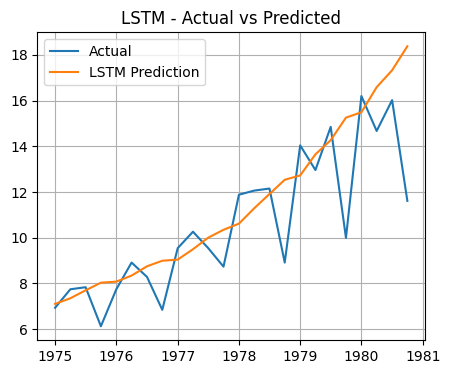

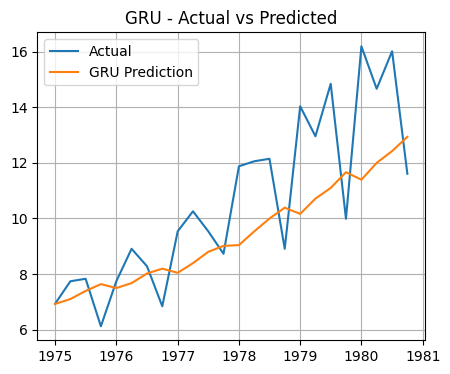

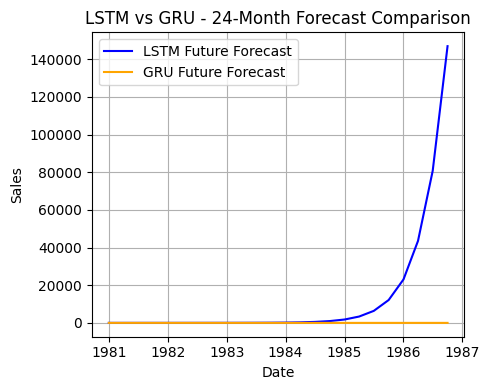

LSTM RMSE: 2.1419, MAE: 1.4135
GRU RMSE: 2.1964, MAE: 1.7922


In [4]:
# Libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load and prepare data
df_jj = pd.read_csv("jj.csv", parse_dates=['date'])
df_jj.set_index('date', inplace=True)
data = df_jj['data'].values.reshape(-1, 1)

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence creation
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 12
X, y = create_sequences(scaled_data, seq_length)

# Train/test split
train_size = len(X) - 24
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
y_test_unscaled = scaler.inverse_transform(y_test)

# LSTM MODEL 
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, verbose=0)

# LSTM prediction
predicted_lstm = lstm_model.predict(X_test)
predicted_lstm_unscaled = scaler.inverse_transform(predicted_lstm)

# LSTM future forecast
future_input_lstm = X[-1]
future_preds_lstm = []
for _ in range(24):
    pred = lstm_model.predict(future_input_lstm.reshape(1, seq_length, 1))
    future_preds_lstm.append(pred[0, 0])
    future_input_lstm = np.append(future_input_lstm[1:], pred).reshape(seq_length, 1)
future_preds_lstm = scaler.inverse_transform(np.array(future_preds_lstm).reshape(-1, 1))

# GRU MODEL 
gru_model = Sequential()
gru_model.add(GRU(50, activation='relu', input_shape=(seq_length, 1)))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')
gru_model.fit(X_train, y_train, epochs=50, verbose=0)

# GRU prediction
predicted_gru = gru_model.predict(X_test)
predicted_gru_unscaled = scaler.inverse_transform(predicted_gru)

# GRU future forecast
future_input_gru = X[-1]
future_preds_gru = []
for _ in range(24):
    pred = gru_model.predict(future_input_gru.reshape(1, seq_length, 1))
    future_preds_gru.append(pred[0, 0])
    future_input_gru = np.append(future_input_gru[1:], pred).reshape(seq_length, 1)
future_preds_gru = scaler.inverse_transform(np.array(future_preds_gru).reshape(-1, 1))

#  PLOTS 

# LSTM Prediction vs Actual
plt.figure(figsize=(5, 4))
plt.plot(df_jj.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual')
plt.plot(df_jj.index[-len(predicted_lstm_unscaled):], predicted_lstm_unscaled, label='LSTM Prediction')
plt.title("LSTM - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# GRU Prediction vs Actual
plt.figure(figsize=(5, 4))
plt.plot(df_jj.index[-len(y_test_unscaled):], y_test_unscaled, label='Actual')
plt.plot(df_jj.index[-len(predicted_gru_unscaled):], predicted_gru_unscaled, label='GRU Prediction')
plt.title("GRU - Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

# Combined 24-Month Future Forecast Plot
future_dates = pd.date_range(start=df_jj.index[-1] + pd.DateOffset(months=3), periods=24, freq='QS')
plt.figure(figsize=(5, 4))
plt.plot(future_dates, future_preds_lstm, label='LSTM Future Forecast', color='blue')
plt.plot(future_dates, future_preds_gru, label='GRU Future Forecast', color='orange')
plt.title("LSTM vs GRU - 24-Month Forecast Comparison")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  METRICS 
rmse_lstm = sqrt(mean_squared_error(y_test_unscaled, predicted_lstm_unscaled))
mae_lstm = mean_absolute_error(y_test_unscaled, predicted_lstm_unscaled)

rmse_gru = sqrt(mean_squared_error(y_test_unscaled, predicted_gru_unscaled))
mae_gru = mean_absolute_error(y_test_unscaled, predicted_gru_unscaled)

print(f"LSTM RMSE: {rmse_lstm:.4f}, MAE: {mae_lstm:.4f}")
print(f"GRU RMSE: {rmse_gru:.4f}, MAE: {mae_gru:.4f}")
